# Lab 4: Data Visualization

Author: Rohan Narain

# DUE: [MM/DD/YY]

In this lab, we're going to learn about data visualization! We'll look at:
* Some basic visualizations in different sports and how to interpret them
* Some more advanced visualizations and how to interpret them
* Using data to make a pitch chart for a single baseball game
* Making a movement chart for a basketball player during a game

Be sure to submit the lab at the end!

In [1]:
import math
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datascience import *
import seaborn as sns

from client.api.notebook import Notebook
from IPython.display import Image
from IPython.core.display import HTML

# Importing dependencies

In [12]:
# Install dependencies

!pip install bs4

  Running setup.py install for bs4: started
    Running setup.py install for bs4: finished with status 'done'


First, we'll look at a basic visualization--a spray chart for Stephen Curry's shooting efficiency on different parts of the court. Try to think about why a chart like this would be useful. 

In [2]:
Image(url="https://i.pinimg.com/originals/38/17/00/381700af50dcb12321bae922889253b6.jpg")

**Question 1a:** Comment in the cell below on why this chart is useful, and some positive and negative aspects (fonts, colors, etc.).

...

Here's another visualization, this time from [Fangraphs](https://www.fangraphs.com/tht/who-consistently-hit-the-longest-home-runs-in-2011/).

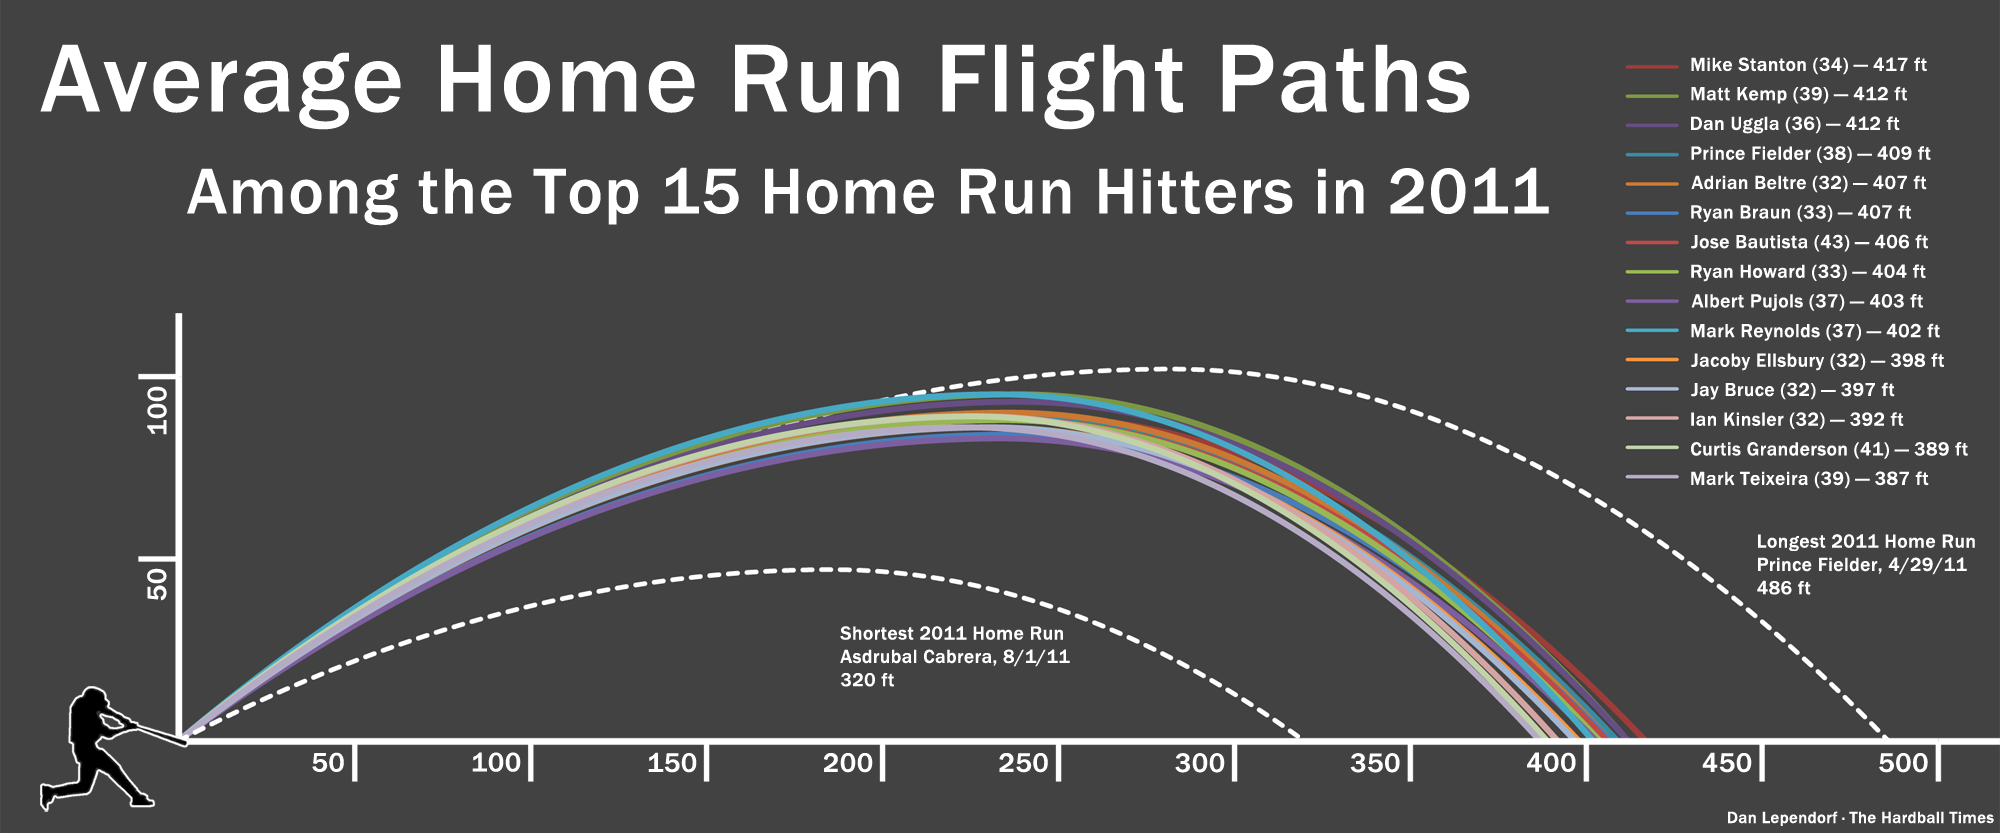

In [3]:
Image("hr_distribution.png")

**Question 1b:** Comment briefly on the pros and cons of this visualization. What parts of it are confusing, and what parts of it are useful? What information can be easily retrieved from a visualization like this?

...

Let's try and look at a more advanced, but potentially more confusing visualization now: a heatmap. Heatmaps are widely used and very useful outside of sports analytics, but they have applications everywhere! They're perfect, for example, for producing a version of the spray chart from earlier.

In [4]:
Image(url="http://toddwschneider.com/data/ballr/stephen-curry-2015-16-shot-chart-heat-map-ex-restricted-area.png")

**Question 2:** Notice that this heat map is much simpler than the spray chart from Question 1a, and that it displays different information. Talk about the difference between this heat map and the spray chart from Question 1a, and the pros and cons of this visualization. Why would you want to use this type of visualization over the spray chart? Why would you *not* want to use this? 

...

Now that we've looked at some distributions, how about we try and make one? Let's start with a pitch chart from Game 7 of the 2016 World Series!

In [3]:
#### Don't worry about this cell. It's just loading the data that we'll need. ####

game_id = '361102105'
game_url = 'https://api-secure.sports.yahoo.com/v1/editorial/s/boxscore/mlb.g.' + game_id + \
            '?lang=en-US&region=US&tz=America%2FChicago&ysp_redesign=1&mode=&v=4&ysp_enable_last_update=1&polling=1'
import requests
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.10; rv:39.0) Gecko/20100101 Firefox/39.0'}
response = requests.get(game_url, headers=headers)
game_data = response.json()

pitches = game_data['service']['boxscore']['gamepitches']['mlb.g.'+game_id]

If you're feeling curious, open up `pitches` in a new cell and take a look at it. It happens to be loaded in a JSON (JavaScript Object Notation) file, which Python can interpret as a dictionary using the `requests` module.

After loading the data, we find that `pitches` has pitch-by-pitch data. Let's look at how many pitches were thrown in the game, for a cursory glance. Run the next cell to find out!

In [4]:
print("Total number of pitches thrown during the game: " + str(len(pitches)))

Total number of pitches thrown during the game: 343


In [5]:
#### Here's another cell we don't need to worry about--this is just loading the data into a format
#### that's easy to work with. Also, don't worry about the warning. 

import pandas as pd
pitch_df = pd.DataFrame(pitches)
transpose_pitch_df = pitch_df.transpose()
for val in list(transpose_pitch_df.columns.values):
    transpose_pitch_df[val] = transpose_pitch_df[val].convert_objects(convert_numeric=True)

from bs4 import BeautifulSoup
pitcher_url = 'http://sports.yahoo.com/mlb/players/' + str(transpose_pitch_df['pitcher']['10100']) + '/'
req = requests.get(pitcher_url)
html = req.text
soup = BeautifulSoup(html, 'html.parser')
batter_url = 'http://sports.yahoo.com/mlb/players/' + str(transpose_pitch_df['batter']['10100']) + '/'
req = requests.get(batter_url)
html = req.text
soup = BeautifulSoup(html, 'html.parser')

kluber = transpose_pitch_df[transpose_pitch_df.pitcher == 9048]
hendricks = transpose_pitch_df[transpose_pitch_df.pitcher == 9758]

C:\Users\Rohan\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Now that we've loaded our data, let's look at 